# Loan Default Risk

The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.
You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

## Part 1 Data Preparation

### 1-1 Import libraries and data

In [100]:
# basic libaries 
import pandas as pd
import numpy as np
import datetime

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import seaborn as sns
from collections import Counter


# Sklearn machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Just personal preference of colours 
Kookaburra = "#003C55"
Possum = "#73234B"
DarkBlue = "#061E3E"
Blue = "#002960"
Red = "#CD202C"
Turquoise = "#006983"
Cyan = "#0093D3"

# Million
Million = 1000000

In [101]:
file_path = "Loan_Data.csv"
Loan = pd.read_csv(file_path)

Loan.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [32]:
Loan = Loan.drop(["customer_id"], axis = 1) # Drop customer ID as it is irrelevant
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   credit_lines_outstanding  10000 non-null  int64  
 1   loan_amt_outstanding      10000 non-null  float64
 2   total_debt_outstanding    10000 non-null  float64
 3   income                    10000 non-null  float64
 4   years_employed            10000 non-null  int64  
 5   fico_score                10000 non-null  int64  
 6   default                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


### 1-2 Data Exploration

#### Visualise default risk distribution

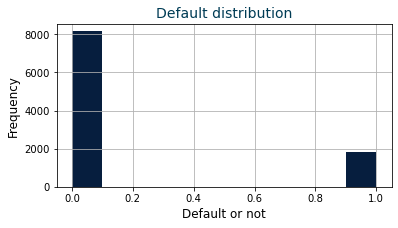

Number of defaults: 1851
Number of non-defaults:8149


In [24]:
plt.figure(figsize=(6, 3))  

Loan["default"].hist(color = DarkBlue)

# Set the x-axis label font size to 12
plt.xlabel('Default or not', fontsize=12)

# Set the y-axis label font size to 12
plt.ylabel('Frequency', fontsize=12)

# Set the title of the plot to 'Age Distribution'
plt.title('Default distribution', fontsize = 14, color = Kookaburra)

plt.show()

Num_Default = len(Loan[Loan["default"] == 1])
Num_nonDefault = len(Loan[Loan["default"] == 0])

print("Number of defaults: {}\nNumber of non-defaults:{}".format(Num_Default, Num_nonDefault))

The graph shows an inbalance between the defaults and non-defaults, suggesting that further method to balance the distribution of labels is needed.  

## Part 2 Data Engineering

### 2-1 Resample data

In [102]:
X = Loan
y = Loan["default"]

# Oversamply default instances to balance the data
X_oversampled, y_oversampled = resample(X[y == 1],
                                        y[y == 1],
                                        replace = True,
                                        n_samples = len(X[y == 0]),
                                        random_state = 168)

X_balanced = np.vstack((X[y == 0], X_oversampled))
y_balanced = np.hstack((y[y == 0], y_oversampled))

# Drop the label
X_balanced = X_balanced[::,:-1]

# Label distribution after oversampling the minority
print("Number of defaults: {}\nNumber of non-defaults:{}".format(np.count_nonzero(y_balanced == 1), 
                                                                 np.count_nonzero(y_balanced == 0)))

Number of defaults: 8149
Number of non-defaults:8149


### 2-2 Split data into train and test sets

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4,
                                                    random_state=1, stratify=y_balanced)

### 2-3 Value Standardisation

In [118]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

## Part 3 Machine Learning Algorithm

### 3-1 Naive Bayes

In [119]:
gnb = GaussianNB()
pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

print("The accuracy of Naive Bayes model is:", accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))

The accuracy of Naive Bayes model is: 0.8955521472392638
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3260
           1       0.92      0.87      0.89      3260

    accuracy                           0.90      6520
   macro avg       0.90      0.90      0.90      6520
weighted avg       0.90      0.90      0.90      6520



### 3-2 Logistic Regression

In [120]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit= logit.predict(X_test)

print("The accuracy of logistic model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logistic model is: 0.976840490797546
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3260
           1       0.98      0.98      0.98      3260

    accuracy                           0.98      6520
   macro avg       0.98      0.98      0.98      6520
weighted avg       0.98      0.98      0.98      6520



### 3-3 Random Forest

In [121]:
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

In [122]:
print("The accuracy of random forest is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

The accuracy of random forest is: 0.9961656441717791
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3260
           1       0.99      1.00      1.00      3260

    accuracy                           1.00      6520
   macro avg       1.00      1.00      1.00      6520
weighted avg       1.00      1.00      1.00      6520

